**LETS WALK INTO EDA ANALYSIS**


import neccessary libs for EDA

->numpy

->pandas

->seaborn

->matplotlib


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

Load dataset as comma separated values using pd

In [2]:
ipl_data=pd.read_csv('/content/Overwise statistics without super over.csv')

In [3]:
ipl_data.head()

,match_id,inning,batting_team,bowling_team,over,runs,wickets,winner
0,1.0,1.0,Sunrisers Hyderabad,Royal Challengers Bangalore,1.0,7.0,0.0,Sunrisers Hyderabad
1,1.0,1.0,Sunrisers Hyderabad,Royal Challengers Bangalore,2.0,16.0,1.0,Sunrisers Hyderabad
2,1.0,1.0,Sunrisers Hyderabad,Royal Challengers Bangalore,3.0,6.0,0.0,Sunrisers Hyderabad
3,1.0,1.0,Sunrisers Hyderabad,Royal Challengers Bangalore,4.0,4.0,0.0,Sunrisers Hyderabad
4,1.0,1.0,Sunrisers Hyderabad,Royal Challengers Bangalore,5.0,9.0,0.0,Sunrisers Hyderabad


Getting to know size of our datasets

In [4]:
ipl_data.shape

(30240, 8)

Check any null values are there

In [5]:
ipl_data.isnull().sum()

,0
match_id,0
inning,0
batting_team,1226
bowling_team,1226
over,0
runs,0
wickets,0
winner,160


Visualizing null values using heatmap

<Axes: >

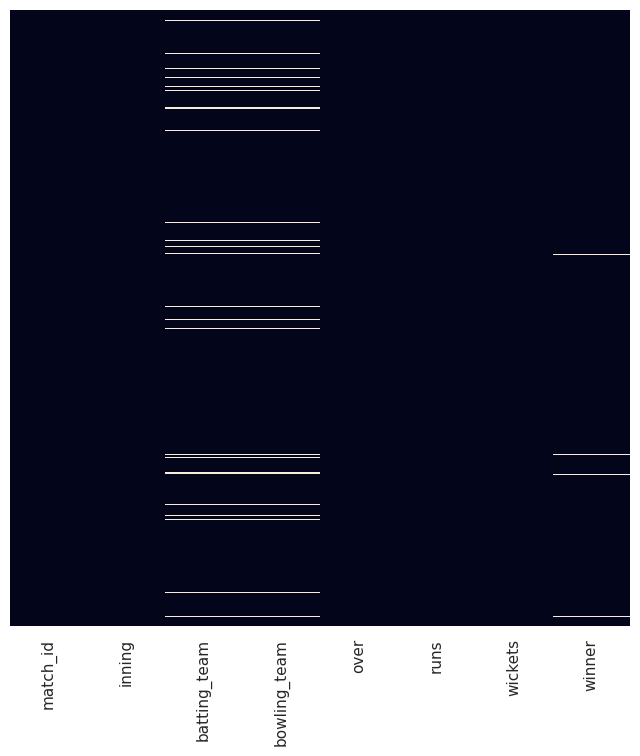

In [6]:
sns.set()
plt.figure(figsize=(8,8))
sns.heatmap(ipl_data.isnull(),yticklabels=False , cbar= False)

Relationship bewteen 'Batting_team' and 'inning' using countplot

<Axes: xlabel='batting_team', ylabel='count'>

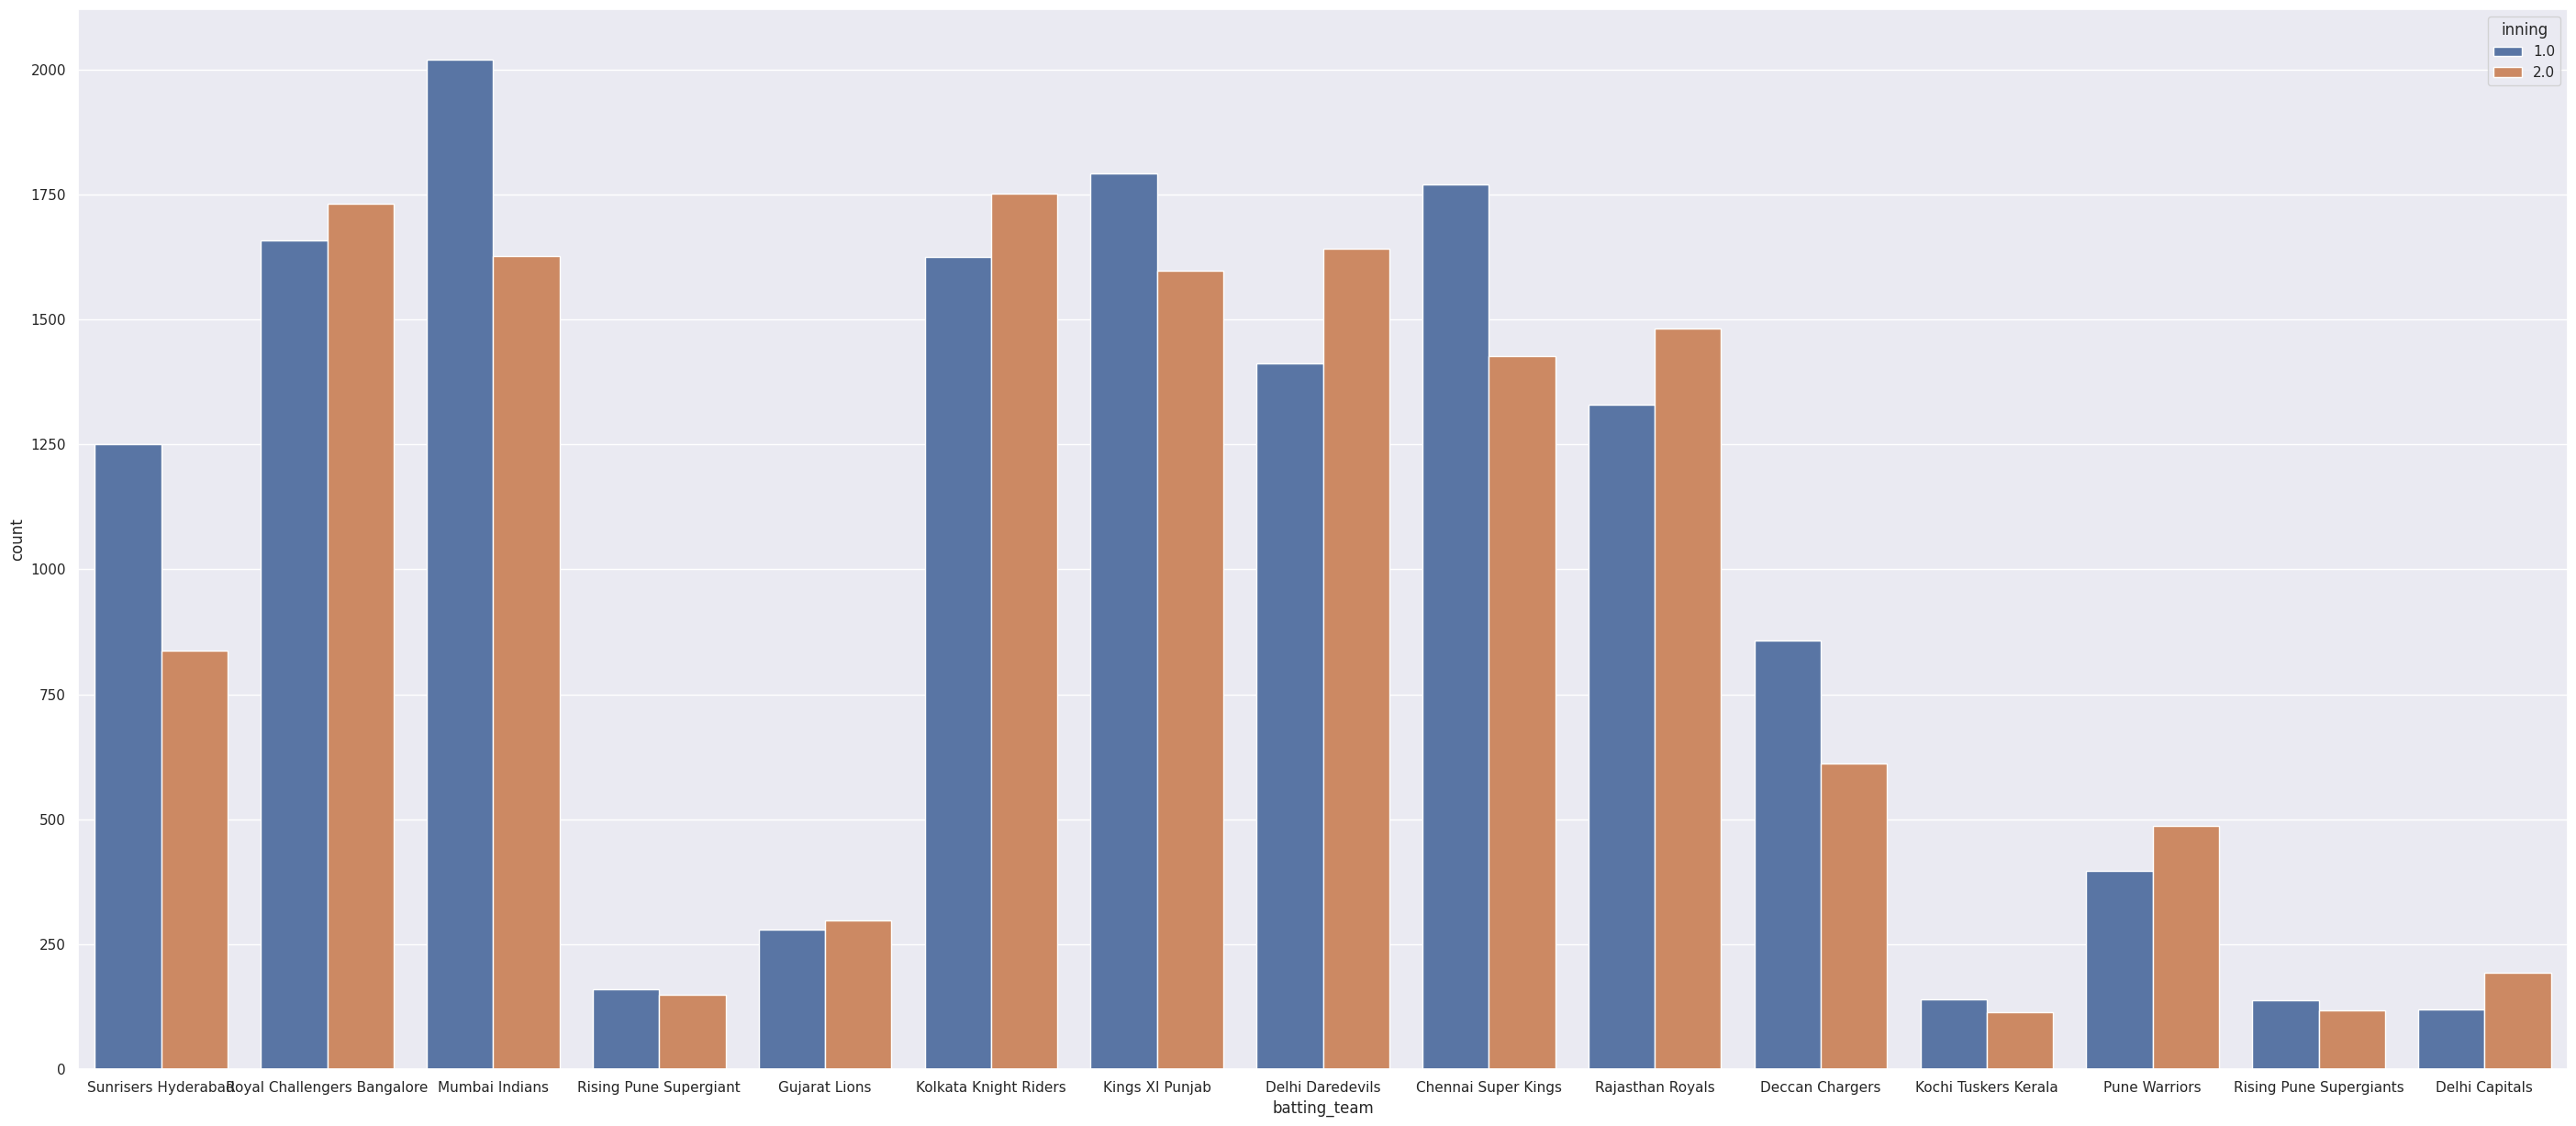

In [7]:
plt.figure(figsize=(35,15))
sns.countplot(x='batting_team' , hue='inning' ,data=ipl_data , palette='deep')

Relationship bewteen 'Bowling_team' and 'inning' using countplot

<Axes: xlabel='bowling_team', ylabel='count'>

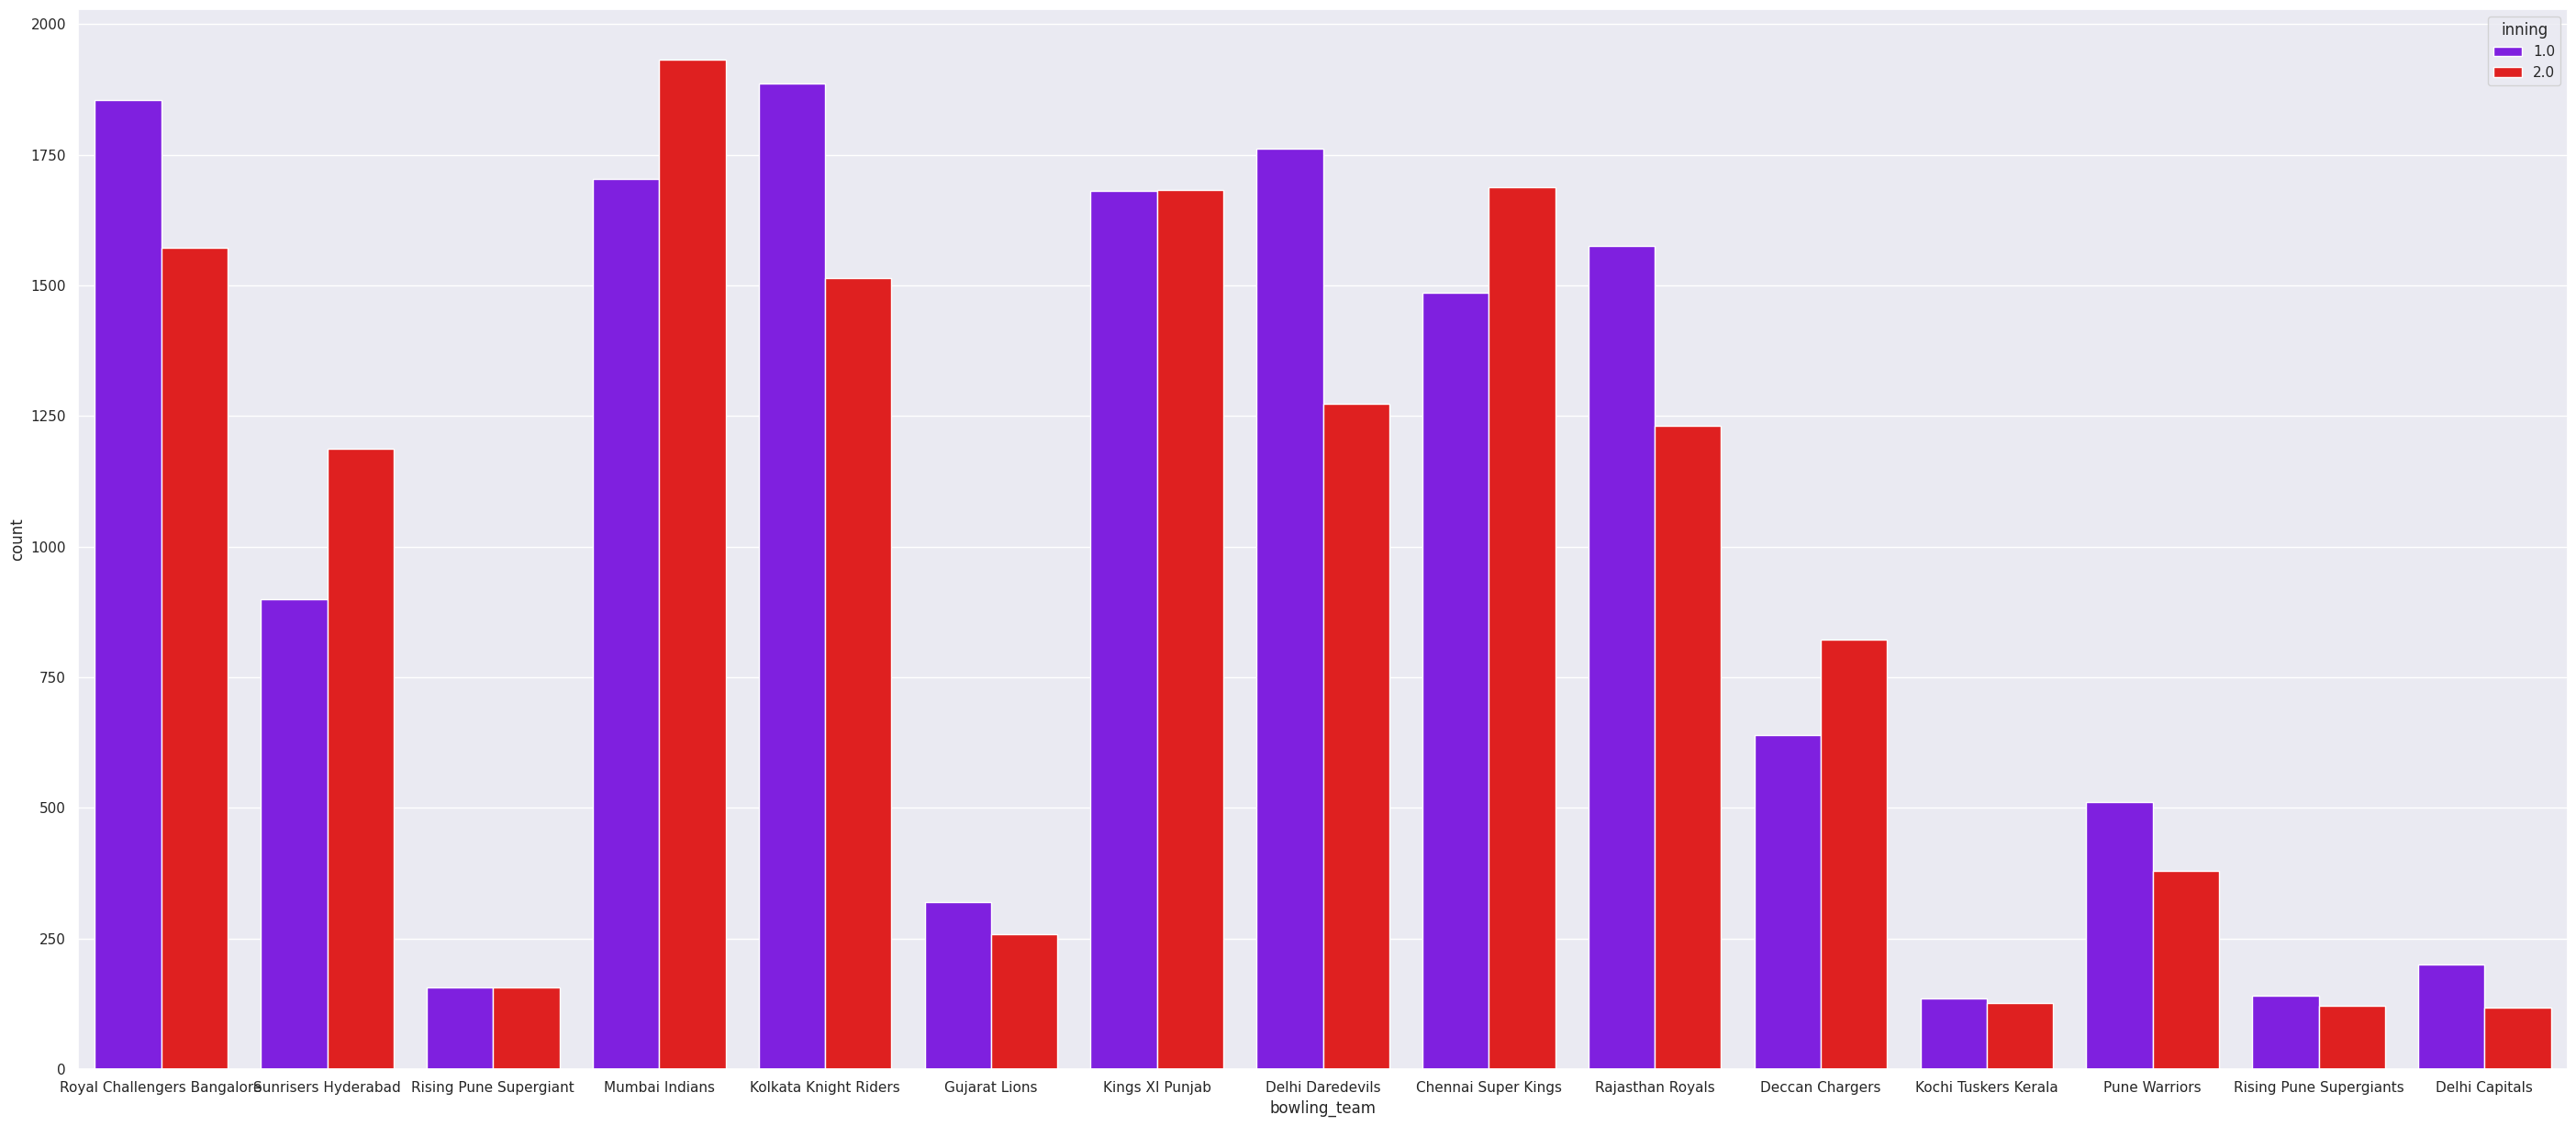

In [8]:
plt.figure(figsize=(35,15))
sns.countplot(x='bowling_team' , hue='inning' ,data=ipl_data , palette='rainbow')

Visualizing total number of run by each batting team by barplot

<Axes: xlabel='batting_team', ylabel='runs'>

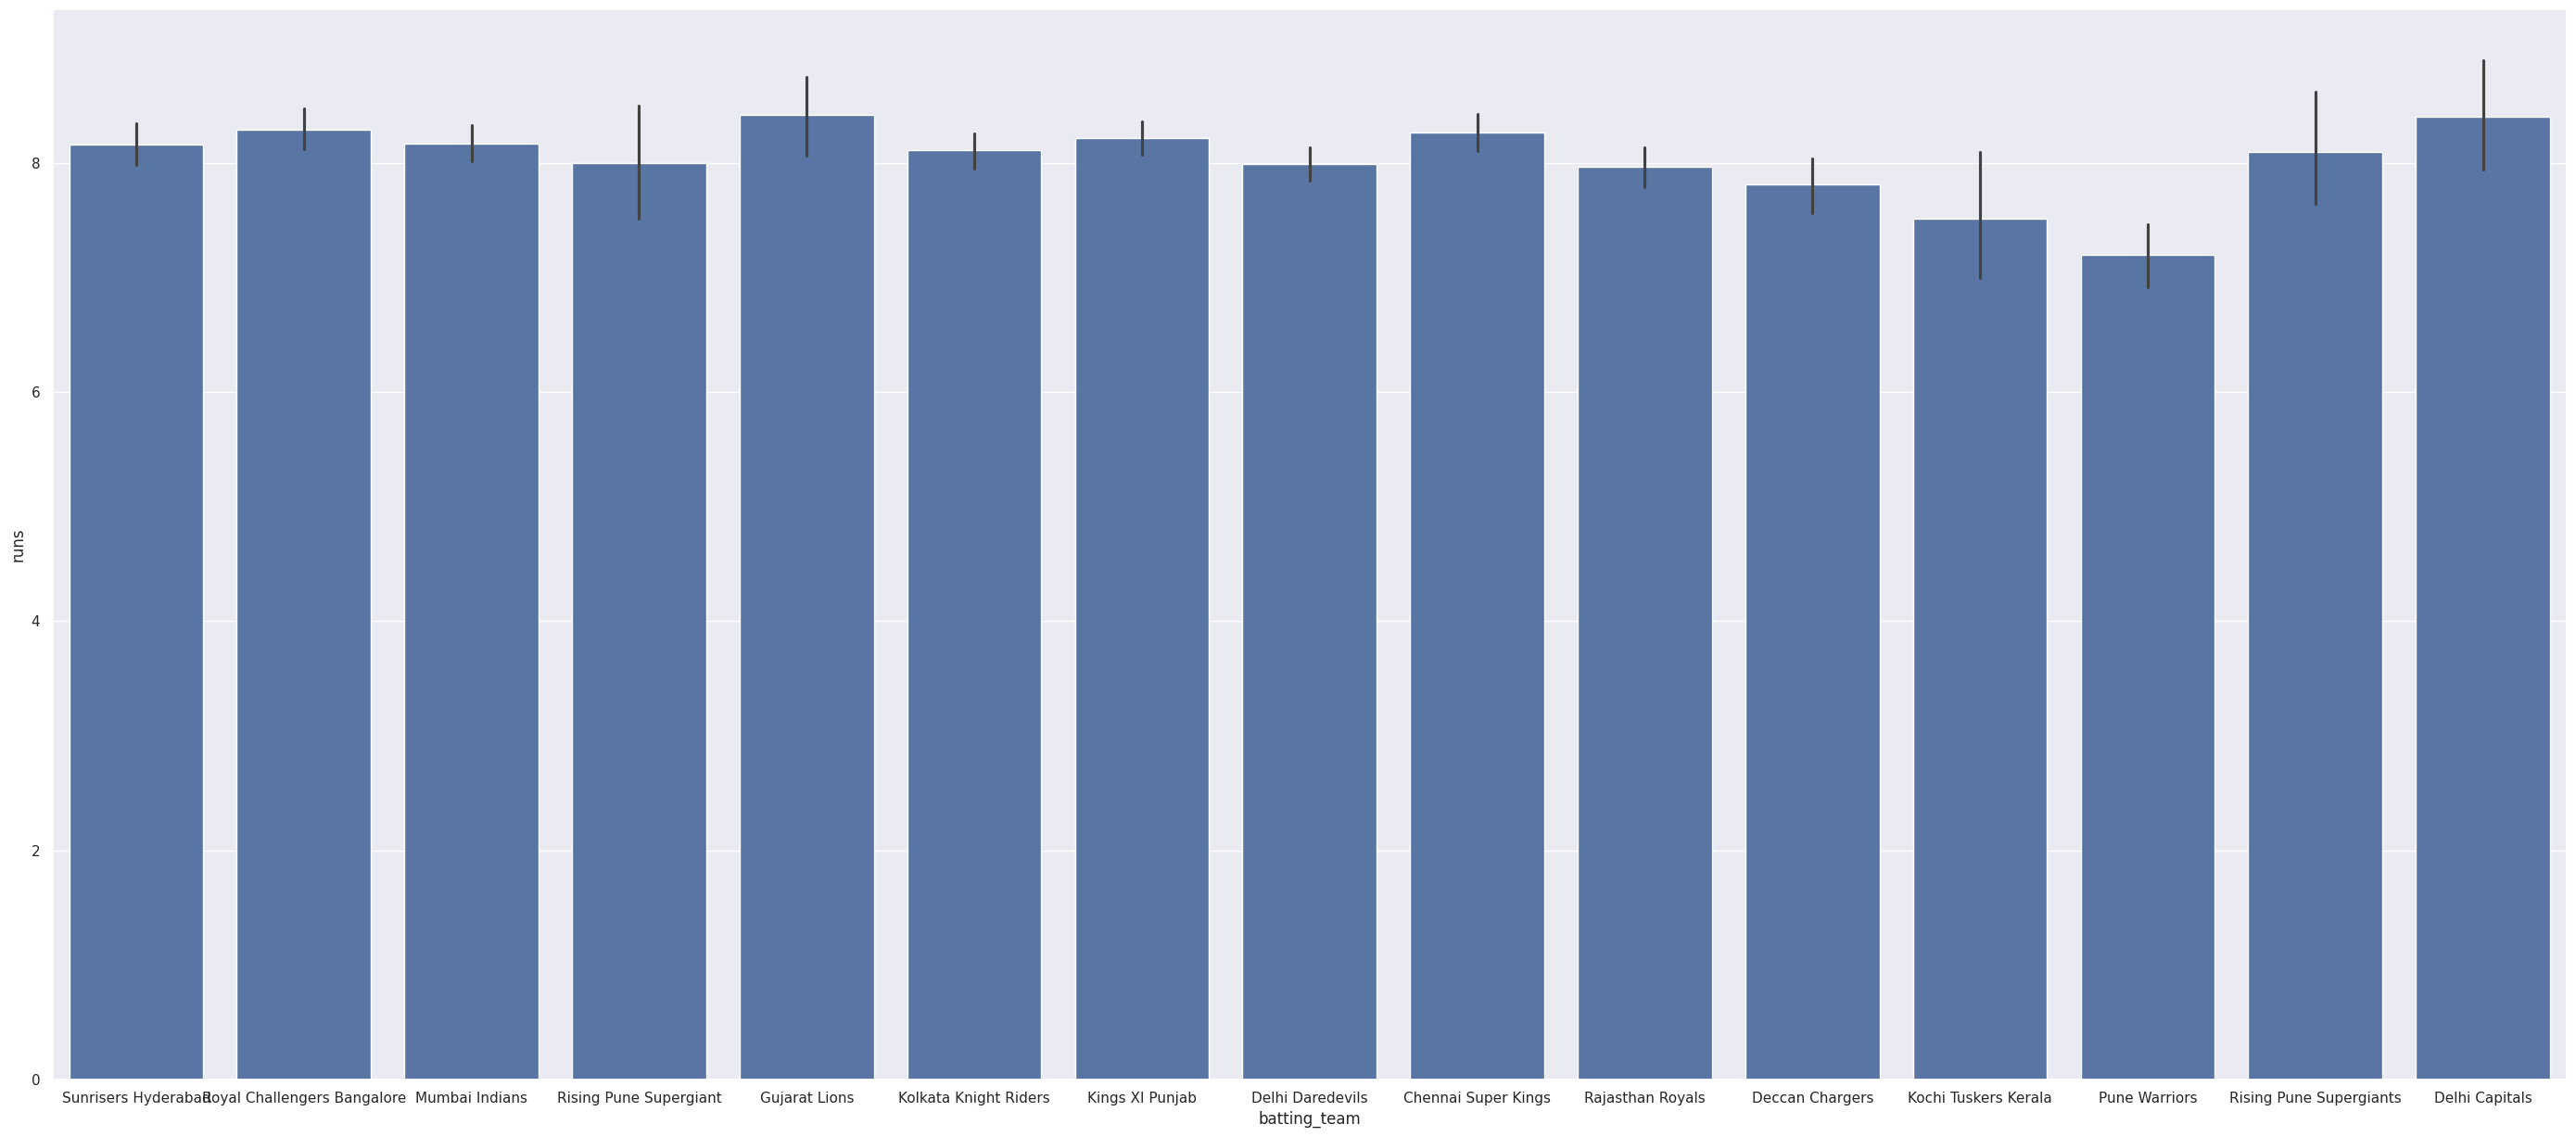

In [9]:
plt.figure(figsize=(35,15))
sns.barplot(x='batting_team' , y = 'runs' , data = ipl_data)

Finding average runs secured by each batting_team

<Axes: xlabel='batting_team', ylabel='runs'>

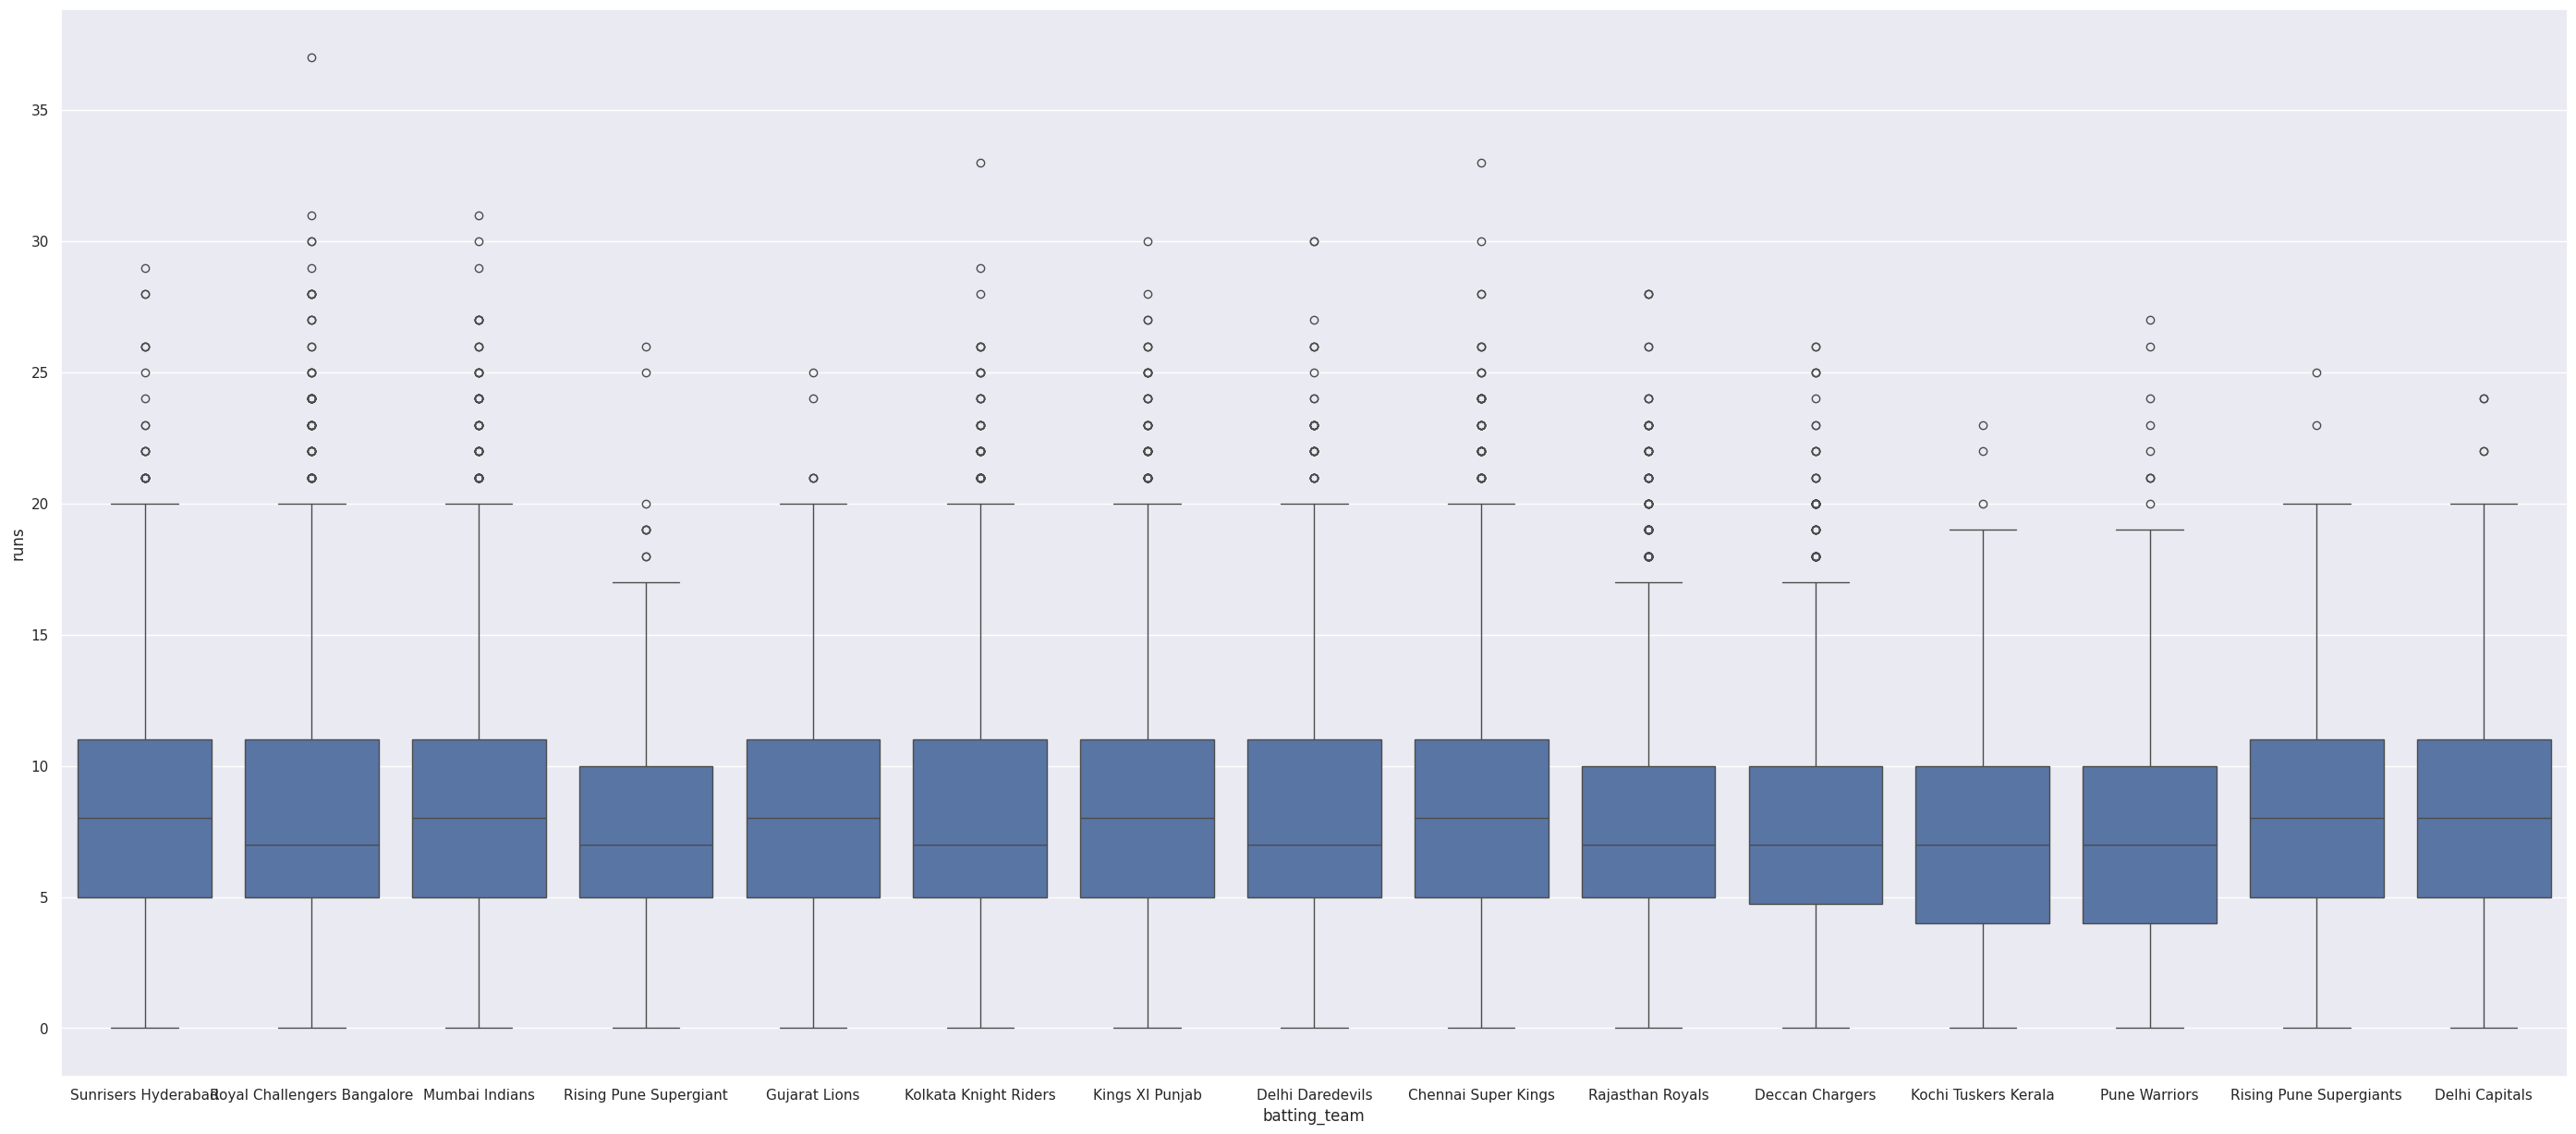

In [10]:
plt.figure(figsize=(35,15))
sns.boxplot(x='batting_team' , y='runs' , data=ipl_data)

Since our datasets is larger and quantity of null values less we can drop that

In [11]:
ipl_data = ipl_data.dropna()

<Axes: >

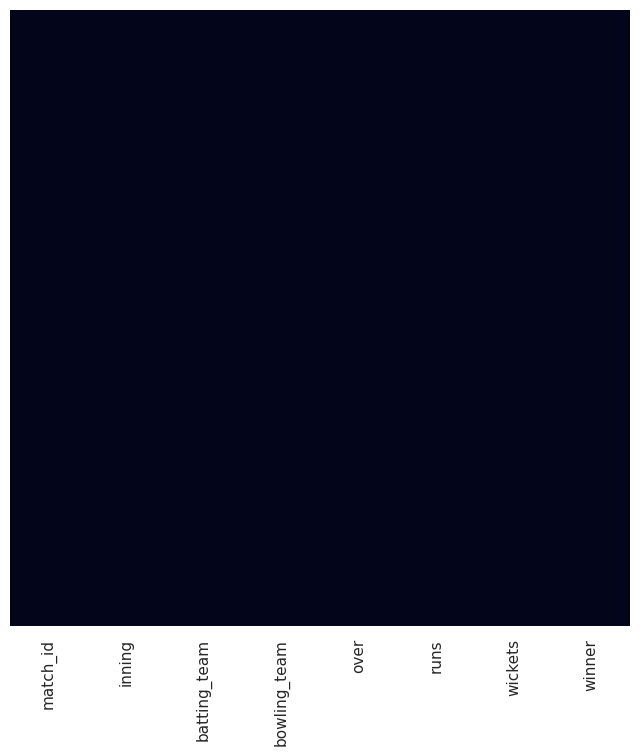

In [12]:
sns.set()
plt.figure(figsize=(8,8))
sns.heatmap(ipl_data.isnull(),yticklabels=False , cbar= False)

visulization which is won most using countplot

<Axes: xlabel='winner', ylabel='count'>

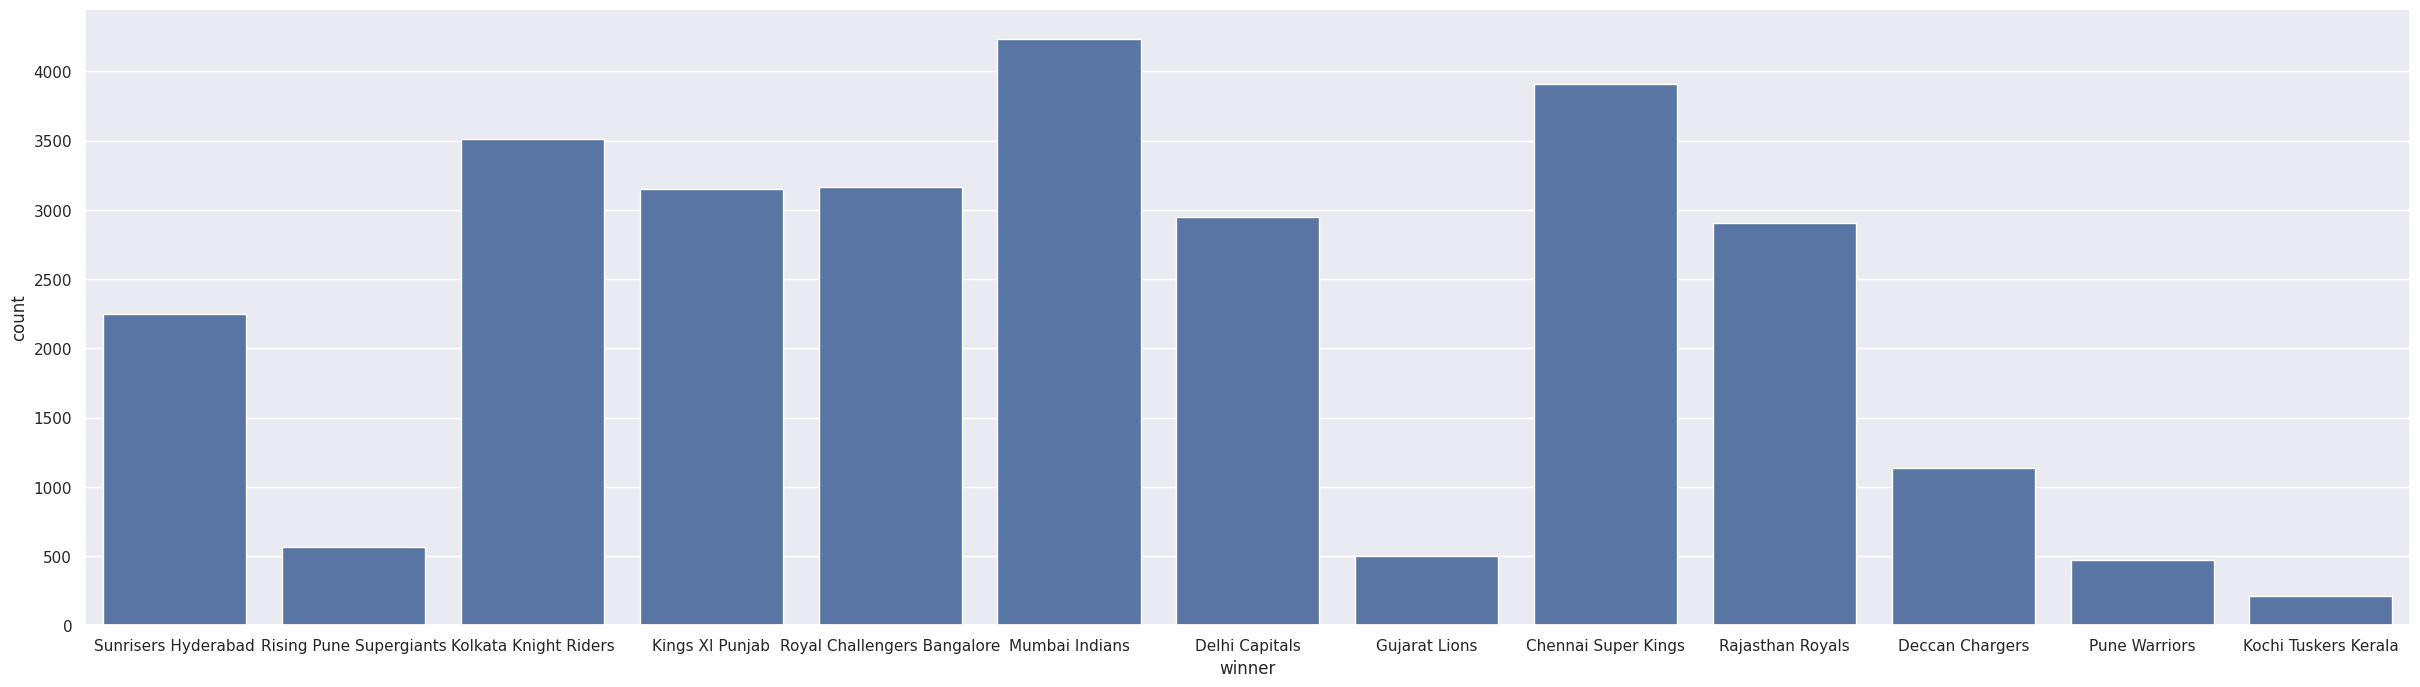

In [13]:
sns.set()
plt.figure(figsize=(30,8))
sns.countplot(x='winner' , data=ipl_data)

In [14]:
ipl_data['bowling_team'].value_counts()

,count
bowling_team,
Mumbai Indians,3636
Royal Challengers Bangalore,3402
Kolkata Knight Riders,3401
Kings XI Punjab,3363
Chennai Super Kings,3173
Delhi Daredevils,3033
Rajasthan Royals,2783
Sunrisers Hyderabad,2087
Deccan Chargers,1462


Encoding categorical values to numerical values

In [15]:
encoder=LabelEncoder()

In [16]:
ipl_data['bowling_team']=encoder.fit_transform(ipl_data['bowling_team'])

In [17]:
ipl_data['bowling_team'].value_counts()

,count
bowling_team,
8,3636
13,3402
7,3401
5,3363
0,3173
3,3033
10,2783
14,2087
1,1462


In [19]:
ipl_data['batting_team']=encoder.fit_transform(ipl_data['batting_team'])

In [20]:
ipl_data.head()

,match_id,inning,batting_team,bowling_team,over,runs,wickets,winner
0,1.0,1.0,14,13,1.0,7.0,0.0,Sunrisers Hyderabad
1,1.0,1.0,14,13,2.0,16.0,1.0,Sunrisers Hyderabad
2,1.0,1.0,14,13,3.0,6.0,0.0,Sunrisers Hyderabad
3,1.0,1.0,14,13,4.0,4.0,0.0,Sunrisers Hyderabad
4,1.0,1.0,14,13,5.0,9.0,0.0,Sunrisers Hyderabad


In [21]:
ipl_data.describe()

,match_id,inning,batting_team,bowling_team,over,runs,wickets
count,28952.000000,28952.000000,28952.000000,28952.000000,28952.000000,28952.000000,28952.000000
mean,1802.896311,1.485493,6.915239,6.927432,10.228343,8.100718,0.303848
std,3472.548713,0.499798,4.365103,4.365810,5.678244,4.586175,0.537048
min,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,190.000000,1.000000,3.000000,3.000000,5.000000,5.000000,0.000000
50%,378.000000,1.000000,7.000000,7.000000,10.000000,7.000000,0.000000
75%,567.000000,2.000000,10.000000,10.000000,15.000000,11.000000,1.000000
max,11415.000000,2.000000,14.000000,14.000000,20.000000,37.000000,4.000000


Dropping dependent variable from our datasets

In [22]:
x=ipl_data.drop(columns='winner' , axis=1)
y=ipl_data['winner']

In [24]:
print(x)

       match_id  inning  batting_team  bowling_team  over  runs  wickets
0           1.0     1.0            14            13   1.0   7.0      0.0
1           1.0     1.0            14            13   2.0  16.0      1.0
2           1.0     1.0            14            13   3.0   6.0      0.0
3           1.0     1.0            14            13   4.0   4.0      0.0
4           1.0     1.0            14            13   5.0   9.0      0.0
...         ...     ...           ...           ...   ...   ...      ...
30235   11415.0     2.0             0             8  16.0  20.0      0.0
30236   11415.0     2.0             0             8  17.0   5.0      0.0
30237   11415.0     2.0             0             8  18.0  20.0      0.0
30238   11415.0     2.0             0             8  19.0  13.0      1.0
30239   11415.0     2.0             0             8  20.0   7.0      2.0

[28952 rows x 7 columns]
